# Week 2: An End-to-End Machine Learning System Development - Additional exercises
<font color='#AC135A'>**Applied Machine Learning** - **Sheffield Hallam University**</font>


---

## Fruit Recognition - Introduction

As a complement to this week's lesson, you will now perform a classification task on your own, applying what was learnt in the lectures and in the Iris classification exercise. The dataset this time consists of fruits, as well as some properties that will allow your classifier to distinguish between different fruits (4 classes).

---

## <font color="#672146">1. Prepare your dataset</font>

Before, we loaded the dataset using the existing datasets within scikit-learn. This time you have a separate file called `fruit_data_with_colors.xlsx`. You will find this file in the module site. After dowloading it, drag-and-drop it in your *working directory*:

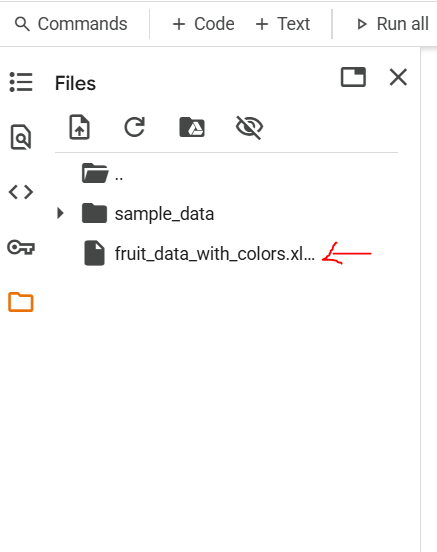





__1.2 Import the dataset processing library - Pandas, and load the data to the project__

Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. It is also compactable with many machine learning pyhton libiraies. We will use `DataFrame` from pandas to manage the raw data files in this project.

* Import `pandas` libaray.
* read the file into a `DataFrame` by using `pandas.read_table()` function. Also see this [Officical Doc](https://pandas.pydata.org/docs/reference/api/pandas.read_table.html) for more details
* You can display the raw `DataFrame` values as a table. see this [Example](https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-table-style/)


In [14]:
import pandas as pd
fruits = pd.read_excel('data/fruit_data_with_colors.xlsx')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


##<font color="#672146"> 2. Understand the dataset a bit more</font>

You can use some pandas build-in functions for the `DataFrame` to check the data quality, distribution, size and statistic features.

__2.1 Check the dataset's size. See the [Doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) for more details__

In [15]:
fruits.shape

(59, 7)



__2.2 Check the lables of the dataset (How many different fruits are in this dataset)__

There is no "check lable" functions in pandas. However, we can use some basic `DataFrame` operations instead:
1. "Slicing" one single colume - "fruit_name" out from the `DataFrame`

>"Slice" and "Select" from the `DataFrame` is useful for many data processing tasks. Please Read the [Doc](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for more details.

2. and then use `unique()` functions to pick up all the unqiue members in this colume

*You can try to do two steps by using only one Pyhton statement*



In [16]:
fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

__2.3 check the basic stat features from this dataset__

Some basic stats such as *mean, standard deviation*, and *data distributions* can be checked by using `DataFrame`'s `describe()` function

In [17]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


__2.4 Use Plot to explore the data__

Instead of using tables, using visualisaiton tool could help us to explore the large dataset more easliy.

There are many visualisation libraries to use in Python. One of them is called Seaborn. Lets draw a histogram here so we know how many samples are in each group!

You need to firstly `import seaborn` and then use its `histplot()` function. See more details in this [Doc](https://seaborn.pydata.org/generated/seaborn.histplot.html)



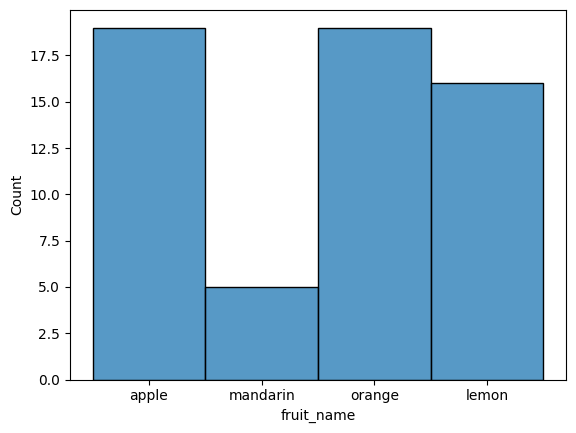

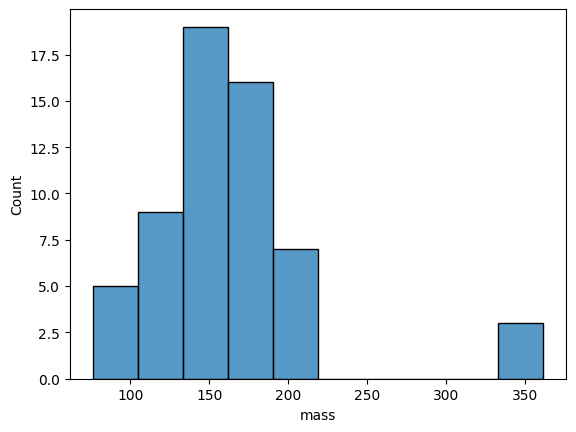

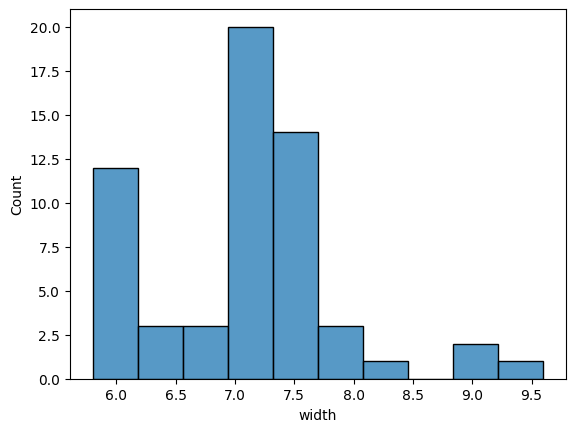

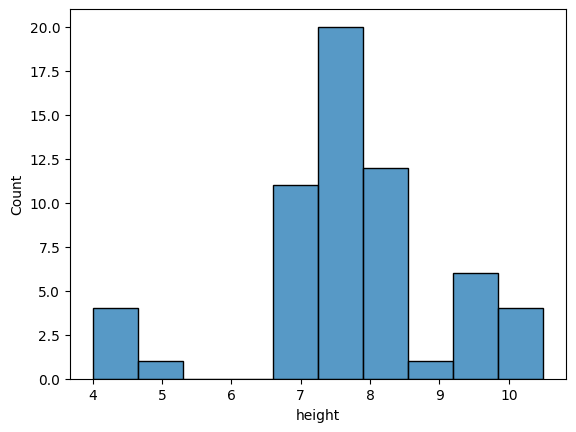

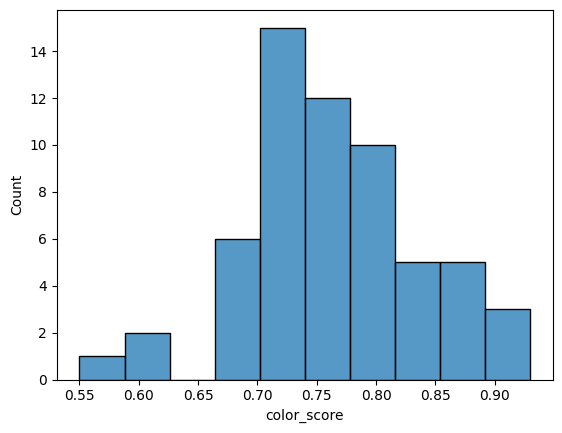

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.histplot(fruits['fruit_name'])
plt.show()
sb.histplot(fruits['mass'], bins=10)
plt.show()
sb.histplot(fruits['width'], bins=10)
plt.show()
sb.histplot(fruits['height'], bins=10)
plt.show()
sb.histplot(fruits['color_score'], bins=10)
plt.show()

> *Exercise:* Check the correlations in your features. What are the most correlated?

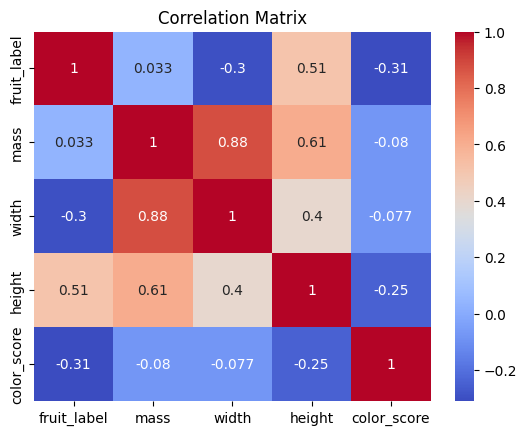

In [19]:
corr = fruits.drop(columns=['fruit_name', 'fruit_subtype']).corr() # correlation

sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Most correlated are width and mass.

## <font color="#672146">3. Create training and testing datasets </font>

Since we are building a supervised machine learning system, the data needs to be labelled in order to train the classification model. Also, we do not use all the data for training but leave some data (usually 30%) for checking their accuracy.

__3.1 Install/Import Scikit-Learn__

It is a simple and efficient tools to create machine learning algorithms in Python

In [20]:
import sklearn

__3.2 Create the input features and output labels from the datase__

In [21]:
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits[['fruit_label']]

__3.3 Separate the entire dataset into training and testing datasets using the build-in sklearn
functions__

In [24]:
from sklearn.model_selection import train_test_split
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X,y)

## <font color="#672146">4. Train your KNN classifier and check the performance</font>
Use what you learned with the previous dataset to train a KNN classifier for the task.

4.1. Train the knn classifier
4.2. Evaluate the performance using the accuracy, confusion matrix, precision and recall
4.3. Perform cross-validation and select the right k. How does it differ from the classifier for the Iris dataset?
4.4. Change the feature you include and report the changes in performance.

In [28]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn_df = KNeighborsClassifier(n_neighbors=3)
knn_df.fit(X_train_df, y_train_df)

# Make a prediction on the first test sample using the DataFrame
sample_df = X_test_df.iloc[0:1]
predicted_class_df = knn_df.predict(sample_df)[0]
actual_class_df = y_test_df.iloc[0]

print(knn_df.predict(sample_df).shape)

#print("Predicted Class: ", predicted_class_df)
#print("Actual Class: ", actual_class_df)


(1,)


/Users/jus/Documents/Code/ML_Uni_Notebooks/.venv/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# <font color="#672146">5. Develop a simple interface for your classifier</font>



Ask the user to type a the mass,	width,	height and color score of a fruit. Use your classifier to make a prediction.

Example:

```
mass = input("Mass: ")
```



In [ ]:
# Your code here

## <font color="#672146">6. [Extra] Machine Learning Visualisation </font>
If you are familiar with Python, you can use some data visualisation libraries such as matplotlib to visualise the distribution of the data in a plot graph.


*   Can you display any two feature pairs (i.e. height - width of fruit dataset or petal_length - petal_width of iris dataset) in a 2D plot?
*   Can you also use different colours for different labels?
*   Can you also draw the trained decision boundaries? (you need to use mesh)




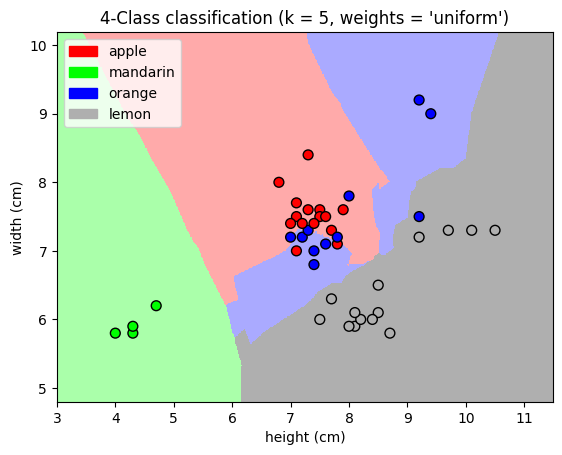

In [ ]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values

  # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat,y_mat)

  # Plot the decision boundary by assigning a color in the color map to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
  # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"% (n_neighbors, weights))
    plt.show()

plot_fruit_knn(X_train, y_train, 5, 'uniform')